In [1]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [2]:
from transformers import pipeline

E:\dev\_nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [4]:
import pandas as pd

In [5]:
cls_outputs = classifier(text)
pd.DataFrame(cls_outputs)

,label,score
0,NEGATIVE,0.901546


In [6]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
ner_outputs = ner_tagger(text)
pd.DataFrame(ner_outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,entity_group,score,word,start,end
0,ORG,0.879011,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590255,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


In [9]:
reader = pipeline("question-answering")
question = "What does the customer want?"
qa_outputs = reader(question=question, context=text)
pd.DataFrame([qa_outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|█████████████████████████████████████████████████████████████████████| 473/473 [00:00<00:00, 237kB/s]
E:\dev\_nlp\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\13709\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or

,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


In [11]:
summarizer = pipeline("summarization")
sum_outputs = summarizer(text, max_length=65, clean_up_tokenization_spaces=True)
print(sum_outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I hope you can understand my dilemma.


In [12]:
en_to_de = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
en2de_outputs = en_to_de(text, clean_up_tokenization_spaces=True, min_length=100)
print(en2de_outputs[0]['translation_text'])

Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.33k/1.33k [00:00<00:00, 669kB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 298M/298M [02:15<00:00, 2.20MB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 42.0/42.0 [00:00<00:00, 21.1kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████| 768k/768k [00:03<00:00, 232kB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 797k/797k [00:09<00:00, 83.3kB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.27M/1.27M [00:08<00:00, 154kB/s]


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von Ihnen zu hören. Aufrichtig, Bumblebee.


In [13]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
gen_outputs = generator(prompt, max_length=200)
print(gen_outputs[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|█████████████████████████████████████████████████████████████████████| 665/665 [00:00<00:00, 222kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████| 548M/548M [12:06<00:00, 754kB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.04M/1.04M [00:05<00:00, 204kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████| 456k/456k [00:02<00:00, 159kB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.36M/1.36M [00:05<00:00, 258kB/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. Please try my request. They will take your order to their warehouse for you before returning it with any problems. I believe you have correctly identified exactly what is in your package.

Note that not only this was not a good decision for Optimus Prime and Megatron; I had to send the figure because there was a defective product that


In [15]:
en_to_zh = pipeline("translation_en_to_zh", model="Helsinki-NLP/opus-mt-en-zh")
en2zh_outputs = en_to_zh(text, clean_up_tokenization_spaces=True, min_length=100)
print(en2zh_outputs[0]['translation_text'])

亲爱的亚马逊,上星期我从你在德国的网上商店订购了一台 " Optimus Prime Action " 人物。 不幸的是,当我打开这个软件包时,我惊恐地发现,我被派去的是威震天的动作人物!作为霸天虎的终身敌人,我希望你能够理解我的两难处境。为了解决这个问题,我要求用威震天来交换我订购的 " Optimus Prime Prime " 人物。我附上我购买该软件的记录的副本。我期待很快听到你的消息。真诚的,大黄蜂。


In [18]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 10000 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [20]:
from datasets import load_dataset

In [21]:
emotions = load_dataset("emotion")
emotions

No config specified, defaulting to: emotion/split


Extracting data files: 100%|████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 125.34it/s]


Dataset emotion downloaded and prepared to C:/Users/13709/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 601.59it/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [22]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [23]:
len(train_ds)

16000

In [24]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [25]:
train_ds.column_names

['text', 'label']

In [26]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [27]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [28]:
import pandas as pd

In [29]:
emotions.set_format(type="pandas")

In [30]:
df = emotions["train"][:]

In [31]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [32]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [33]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [34]:
import matplotlib.pyplot as plt

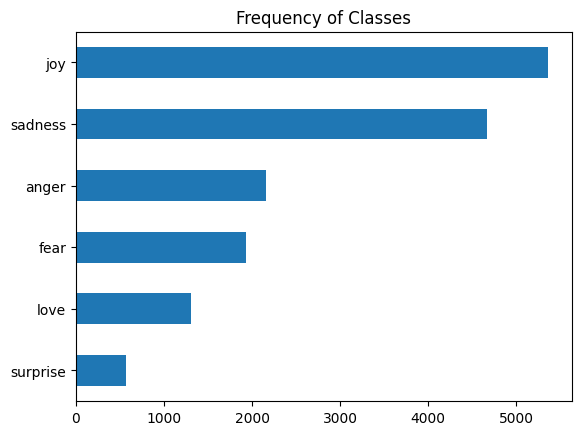

In [35]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

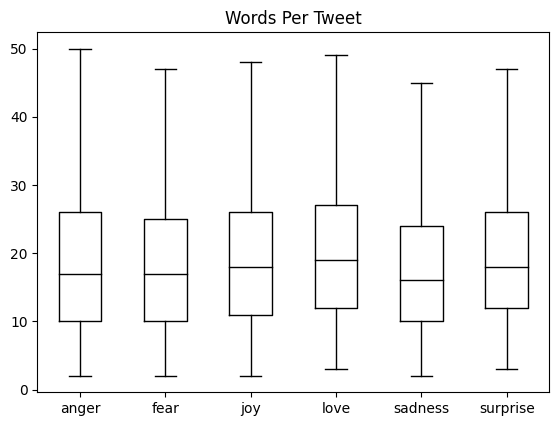

In [36]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [37]:
df

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


In [38]:
emotions.reset_format()

In [39]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [40]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [41]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [42]:
categorical_df = pd.DataFrame({"Name": ["Bumlebee", "Optimus Prime", "Megatron"], "Label ID": [0, 1, 2]})
categorical_df

,Name,Label ID
0,Bumlebee,0
1,Optimus Prime,1
2,Megatron,2


In [43]:
pd.get_dummies(categorical_df["Name"])

,Bumlebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [44]:
import torch
import torch.nn.functional as F

In [46]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

C:\Users\13709\AppData\Local\Temp\ipykernel_18852\3674191911.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids)


torch.Size([38, 20])

In [47]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [48]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [49]:
from transformers import AutoTokenizer

In [50]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading: 100%|██████████████████████████████████████████████████████████████████| 28.0/28.0 [00:00<00:00, 4.68kB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████████| 483/483 [00:00<00:00, 484kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████| 232k/232k [00:01<00:00, 140kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████| 466k/466k [00:02<00:00, 193kB/s]


In [51]:
from transformers import DistilBertTokenizer

In [52]:
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [53]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [54]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [55]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [56]:
tokenizer.vocab_size

30522

In [57]:
tokenizer.model_max_length

512

In [58]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [59]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [60]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [61]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.55ba/s]


In [62]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [63]:
from transformers import AutoModel

In [64]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading: 100%|██████████████████████████████████████████████████████████████████| 268M/268M [02:35<00:00, 1.73MB/s]
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [65]:
device

device(type='cuda')

In [66]:
test_text = "this is a test"
inputs = tokenizer(test_text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [67]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [68]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [69]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [70]:
def extract_hidden_states(batch):
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [71]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [72]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.26ba/s]


In [73]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [74]:
import numpy as np

In [75]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [77]:
from umap import UMAP

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\13709\AppData\Local\Temp\ipykernel_18852\551778329.py:1 in <module>                     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ 'C:\\Users\\13709\\AppData\\Local\\Temp\\ipykernel_18852\\551778329.py'                          │
│                                                                                                  │
│ E:\dev\_nlp\lib\site-packages\umap\__init__.py:2 in <module>                                     │
│                                                                                                  │
│    1 from warnings import warn, catch_warnings, simplefilter                                     │
│ ❱  2 from .umap_ import UMAP                                                                     │
│    3                                                                                             │
│    4 try:                                                                                        │
│    5 │   with catch_warnings():                                                                  │
│                                                                                                  │
│ E:\dev\_nlp\lib\site-packages\umap\umap_.py:28 in <module>                                       │
│                                                                                                  │
│     25 import scipy.sparse                                                                       │
│     26 from scipy.sparse import tril as sparse_tril, triu as sparse_triu                         │
│     27 import scipy.sparse.csgraph                                                               │
│ ❱   28 import numba                                                                              │
│     29                                                                                           │
│     30 import umap.distances as dist                                                             │
│     31                                                                                           │
│                                                                                                  │
│ E:\dev\_nlp\lib\site-packages\numba\__init__.py:42 in <module>                                   │
│                                                                                                  │
│    39 │   │   │   │   │   │   │   │      jit_module)                                             │
│    40                                                                                            │
│    41 # Re-export vectorize decorators and the thread layer querying function                    │
│ ❱  42 from numba.np.ufunc import (vectorize, guvectorize, threading_layer,                       │
│    43 │   │   │   │   │   │   │   get_num_threads, set_num_threads,                              │
│    44 │   │   │   │   │   │   │   set_parallel_chunksize, get_parallel_chunksize,                │
│    45 │   │   │   │   │   │   │   get_thread_id)                                                 │
│                                                                                                  │
│ E:\dev\_nlp\lib\site-packages\numba\np\ufunc\__init__.py:3 in <module>                           │
│                                                                                                  │
│    1 # -*- coding: utf-8 -*-                                                                     │
│    2                                                                                             │
│ ❱  3 from numba.np.ufunc.decorators import Vectorize, GUVectorize, vectorize, guvectorize        │
│    4 from numba.np.ufunc._internal import PyUFunc_None, PyU